In [15]:
from cmapPy.pandasGEXpress.GCToo import GCToo
from cmapPy.pandasGEXpress.parse import parse
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

In [107]:
DATA_PATH = "/Users/Future/Desktop/Summer 2018/Bioinformatics/CCLE/Data/CCLE_NP24.2009_Drug_data_2015.02.24.csv"

pharmacologic_data = pd.read_csv(DATA_PATH)
# print(data, type(data))
# list(data['CCLE Cell Line Name'])
# data.groupby('Compound').nunique()
# data[data['Compound'] == "17-AAG"]
# list(data)
pharmacologic_data.index = pharmacologic_data['CCLE Cell Line Name']
pharmacologic_data = pharmacologic_data.drop(['CCLE Cell Line Name'], axis=1)
pharmacologic_data

,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),Amax,ActArea
CCLE Cell Line Name,,,,,,,,,,,,
1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.67,11.0,2.16,.27,-10,-13,-26,-43","3.31,3.72,5.36,4.67,13.1,.18,2.42,7.51",8,Sigmoid,8.717774,8.000000,-42.558014,0.71240
22RV1_PROSTATE,22Rv1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8",".94,12.5,-14,4.16,-25,-32,-52,-71","1.95,13.3,6.98,21.8,16.0,18.8,4.84,7.93",8,Sigmoid,8.165164,2.329924,-71.589340,1.67230
42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63","13.7,7.70,11.1,6.43,24.0,9.57,9.57,10.4",8,Sigmoid,1.514508,2.682130,-63.491371,1.18520
5637_URINARY_TRACT,5637,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","2.15,9.91,-3.5,.056,-2.1,-14,-30,-62","4.05,9.75,12.7,4.36,11.0,10.0,24.6,.14",8,Sigmoid,8.006595,5.002314,-62.352776,0.99480
639V_URINARY_TRACT,639-V,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","11.8,-7.3,-9.4,-15,-11,-21,-53,-50",".95,5.67,11.1,.68,31.6,22.3,1.45,3.08",8,Sigmoid,0.931196,1.736181,-51.959808,1.54360
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","18.4,4.65,8.64,19.3,-19,-20,-21,-78","25.4,1.92,15.0,23.1,24.7,13.5,1.26,2.51",8,Sigmoid,8.700655,4.260822,-73.333786,1.76650
769P_KIDNEY,769-P,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","2.58,-4.1,6.18,-7.0,-13,-40,-28,-47","18.1,12.4,12.4,5.80,5.24,10.3,6.56,6.84",8,Sigmoid,0.306243,8.000000,-39.688095,1.43760
786O_KIDNEY,786-O,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","-1.2,-.53,.55,-4.1,2.41,-11,-8.8,-52","14.5,15.3,7.11,9.90,4.66,3.60,2.58,11.5",8,Sigmoid,5.267667,7.613148,-51.686317,0.59540
8305C_THYROID,8305C,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","1.00,-1.9,8.83,9.38,-18,-17,-28,-68","6.49,3.67,4.67,6.24,6.70,3.11,9.45,7.52",8,Sigmoid,8.520771,4.950636,-66.228836,1.29290


In [4]:
# print(data.shape)
# new_data = data[data['CCLE Cell Line Name'] == '22RV1_PROSTATE']
# new_data
# for name in data['CCLE Cell Line Name']:
#     i = 0
#     for name2 in data['CCLE Cell Line Name']:
#         if name == name2:
#             i += 1
#     print(i)

In [34]:
data = pd.read_csv("../Data/RNA_readcount.csv")
data.index = data['rid']
data = data.drop(['rid'], axis=1)
gene_expression_data = pd.DataFrame(data.as_matrix(), index=data.index, columns=data.columns)
print(gene_expression_data.shape)

(56318, 1076)


In [108]:
data = pharmacologic_data
gene_names = gene_expression_data.index.values.tolist()
gene_names_df = pd.DataFrame(np.nan, columns=gene_names, index=data.index)
# for gene_name in gene_names_df:
#     gene_names_df.loc['22RV1_PROSTATE', gene_name] = 0
# data[gene_names] = np.nan

In [119]:
drugs_names = data.groupby('Compound').nunique().index.values.tolist()
for drug_name in drugs_names:
    print("Starting {0}...".format(drug_name), end="")
    drug_data = data[data['Compound'] == drug_name]
    drug_data = drug_data.join(gene_expression_data.transpose(), how='inner')
    drug_data.to_csv('../Data/Drugs_data/{0}.csv'.format(drug_name))
    print("{0} Finished!".format(drug_name))

Starting 17-AAG...17-AAG Finished!
Starting AEW541...AEW541 Finished!
Starting AZD0530...AZD0530 Finished!
Starting AZD6244...AZD6244 Finished!
Starting Erlotinib...Erlotinib Finished!
Starting Irinotecan...Irinotecan Finished!
Starting L-685458...L-685458 Finished!
Starting LBW242...LBW242 Finished!
Starting Lapatinib...Lapatinib Finished!
Starting Nilotinib...Nilotinib Finished!
Starting Nutlin-3...Nutlin-3 Finished!
Starting PD-0325901...PD-0325901 Finished!
Starting PD-0332991...PD-0332991 Finished!
Starting PF2341066...PF2341066 Finished!
Starting PHA-665752...PHA-665752 Finished!
Starting PLX4720...PLX4720 Finished!
Starting Paclitaxel...Paclitaxel Finished!
Starting Panobinostat...Panobinostat Finished!
Starting RAF265...RAF265 Finished!
Starting Sorafenib...Sorafenib Finished!
Starting TAE684...TAE684 Finished!
Starting TKI258...TKI258 Finished!
Starting Topotecan...Topotecan Finished!
Starting ZD-6474...ZD-6474 Finished!


In [121]:
for i, drug_name in enumerate(drugs_names):
    if i == 0:
        data = pd.read_csv('../Data/Drugs_data/{0}.csv'.format(drug_name))
    else:
        new_data = pd.read_csv('../Data/Drugs_data/{0}.csv'.format(drug_name))
        data = pd.concat([data, new_data], axis=0)
    print(drug_name + " has been loaded!")
data.shape

17-AAGhas been loaded!
AEW541has been loaded!
AZD0530has been loaded!
AZD6244has been loaded!
Erlotinibhas been loaded!
Irinotecanhas been loaded!
L-685458has been loaded!
LBW242has been loaded!
Lapatinibhas been loaded!
Nilotinibhas been loaded!
Nutlin-3has been loaded!
PD-0325901has been loaded!
PD-0332991has been loaded!
PF2341066has been loaded!
PHA-665752has been loaded!
PLX4720has been loaded!
Paclitaxelhas been loaded!
Panobinostathas been loaded!
RAF265has been loaded!
Sorafenibhas been loaded!
TAE684has been loaded!
TKI258has been loaded!
Topotecanhas been loaded!
ZD-6474has been loaded!


(10900, 56331)

In [124]:
data.index = data['Unnamed: 0']
data = data.drop(['Unnamed: 0'], axis=1)

,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),...,ENSG00000198840.2,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
22RV1_PROSTATE,22Rv1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-5.9,-14,-.068,-15,-38,-71,-74,-80",".35,8.56,.53,21.6,1.08,1.37,3.71,2.17",8,Sigmoid,0.267215,0.329702,...,46491.0,0.0,0.0,0.0,1.0,495259.0,109429.0,2.0,641461.0,0.0
42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-4.2,-62,-19,-72,-69,-84,-78,-91","19.1,42.8,13.5,6.12,7.84,16.9,5.98,7.26",8,Sigmoid,0.052081,0.053038,...,40583.0,1.0,0.0,0.0,2.0,238703.0,94857.0,1.0,298840.0,0.0
5637_URINARY_TRACT,5637,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","3.24,-2.6,9.10,-35,-87,-91,-91,-92","5.69,14.8,29.2,30.4,5.11,.39,1.98,.041",8,Sigmoid,0.060907,0.070823,...,47676.0,0.0,0.0,1.0,4.0,313719.0,80386.0,0.0,279270.0,0.0
639V_URINARY_TRACT,639-V,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-10,-14,-1.2,-23,-74,-87,-90,-91","6.48,.16,2.77,2.31,4.07,1.69,.035,.036",8,Sigmoid,0.147930,0.150094,...,76577.0,0.0,0.0,2.0,2.0,294413.0,88692.0,2.0,210361.0,0.0
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-13,-1.1,17.2,7.23,-24,-77,-91,-92","11.4,20.7,2.72,12.3,25.4,.66,.83,1.75",8,Sigmoid,0.378335,0.422571,...,72407.0,2.0,1.0,3.0,0.0,379040.0,89665.0,0.0,533878.0,0.0
769P_KIDNEY,769-P,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-14,-6.7,-9.8,-18,-68,-61,-76,-74","8.12,.81,24.1,6.79,6.45,9.98,1.09,4.92",8,Sigmoid,0.129797,0.151799,...,62888.0,0.0,2.0,0.0,1.0,334723.0,131152.0,3.0,503584.0,0.0
786O_KIDNEY,786-O,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-16,-1.3,-14,-10,-35,-87,-95,-95","9.48,2.82,9.76,4.89,15.1,2.00,.78,1.19",8,Sigmoid,0.280529,0.279530,...,27492.0,0.0,0.0,1.0,0.0,293847.0,85753.0,4.0,286356.0,0.0
8305C_THYROID,8305C,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-11,-32,1.03,-14,-40,-62,-68,-74","7.20,.47,5.92,4.13,.42,1.60,.059,7.40",8,Sigmoid,0.244568,0.375401,...,40347.0,0.0,0.0,0.0,0.0,168610.0,56246.0,0.0,266631.0,0.0
8505C_THYROID,8505C,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-9.4,-1.7,-10,-12,-48,-79,-91,-93","7.20,14.2,.22,9.86,7.81,3.18,.10,1.29",8,Sigmoid,0.283968,0.282175,...,25862.0,0.0,2.0,0.0,0.0,221694.0,79170.0,0.0,231472.0,0.0


In [125]:
data.to_csv('../Data/Drugs_data/drug_response.csv')

In [126]:
# i = 0
# done_cell_lines = []
# for idx, cell_line in enumerate(pharmacologic_data.index):
#     if gene_expression_data.columns.__contains__(cell_line) and not done_cell_lines.__contains__(cell_line):
#         print("New Cell Line!")
#         done_cell_lines.append(cell_line)
#         gene_expression = gene_expression_data[cell_line]
#         print("Got GeneExpression!")
#         data.loc[cell_line, gene_names] = gene_expression
#         print("Added to data!")
# #         for gene_name, gene_expr in zip(gene_names, gene_expression):
# #             data.loc[cell_line, gene_name] = gene_expr
#     print(i, end='\t')
#     i += 1
# # new_data.iloc[0, :].describe()

In [128]:
data = pd.read_csv('../Data/Drugs_data/17-AAG.csv', index_col='Unnamed: 0')

,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),...,ENSG00000198840.2,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2
22RV1_PROSTATE,22Rv1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-5.9,-14,-.068,-15,-38,-71,-74,-80",".35,8.56,.53,21.6,1.08,1.37,3.71,2.17",8,Sigmoid,0.267215,0.329702,...,46491.0,0.0,0.0,0.0,1.0,495259.0,109429.0,2.0,641461.0,0.0
42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-4.2,-62,-19,-72,-69,-84,-78,-91","19.1,42.8,13.5,6.12,7.84,16.9,5.98,7.26",8,Sigmoid,0.052081,0.053038,...,40583.0,1.0,0.0,0.0,2.0,238703.0,94857.0,1.0,298840.0,0.0
5637_URINARY_TRACT,5637,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","3.24,-2.6,9.10,-35,-87,-91,-91,-92","5.69,14.8,29.2,30.4,5.11,.39,1.98,.041",8,Sigmoid,0.060907,0.070823,...,47676.0,0.0,0.0,1.0,4.0,313719.0,80386.0,0.0,279270.0,0.0
639V_URINARY_TRACT,639-V,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-10,-14,-1.2,-23,-74,-87,-90,-91","6.48,.16,2.77,2.31,4.07,1.69,.035,.036",8,Sigmoid,0.147930,0.150094,...,76577.0,0.0,0.0,2.0,2.0,294413.0,88692.0,2.0,210361.0,0.0
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-13,-1.1,17.2,7.23,-24,-77,-91,-92","11.4,20.7,2.72,12.3,25.4,.66,.83,1.75",8,Sigmoid,0.378335,0.422571,...,72407.0,2.0,1.0,3.0,0.0,379040.0,89665.0,0.0,533878.0,0.0
769P_KIDNEY,769-P,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-14,-6.7,-9.8,-18,-68,-61,-76,-74","8.12,.81,24.1,6.79,6.45,9.98,1.09,4.92",8,Sigmoid,0.129797,0.151799,...,62888.0,0.0,2.0,0.0,1.0,334723.0,131152.0,3.0,503584.0,0.0
786O_KIDNEY,786-O,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-16,-1.3,-14,-10,-35,-87,-95,-95","9.48,2.82,9.76,4.89,15.1,2.00,.78,1.19",8,Sigmoid,0.280529,0.279530,...,27492.0,0.0,0.0,1.0,0.0,293847.0,85753.0,4.0,286356.0,0.0
8305C_THYROID,8305C,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-11,-32,1.03,-14,-40,-62,-68,-74","7.20,.47,5.92,4.13,.42,1.60,.059,7.40",8,Sigmoid,0.244568,0.375401,...,40347.0,0.0,0.0,0.0,0.0,168610.0,56246.0,0.0,266631.0,0.0
8505C_THYROID,8505C,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-9.4,-1.7,-10,-12,-48,-79,-91,-93","7.20,14.2,.22,9.86,7.81,3.18,.10,1.29",8,Sigmoid,0.283968,0.282175,...,25862.0,0.0,2.0,0.0,0.0,221694.0,79170.0,0.0,231472.0,0.0
8MGBA_CENTRAL_NERVOUS_SYSTEM,8-MG-BA,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-38,-15,-1.6,-.52,-57,-79,-83,-80","30.2,13.9,.88,15.4,2.15,.092,3.45,4.57",8,Sigmoid,0.218941,0.234953,...,79258.0,4.0,0.0,2.0,3.0,261740.0,55936.0,2.0,313239.0,1.0


In [139]:
drug_data.drop(['Primary Cell Line Name',
           'Compound',
           'Doses (uM)',
           'Activity Data (median)',
           'Activity SD',
           'Num Data',
           'EC50 (uM)',
           'IC50 (uM)',
           'Amax']
          , axis=1)

,Target,FitType,ActArea,ENSG00000223972.4,ENSG00000227232.4,ENSG00000243485.2,ENSG00000237613.2,ENSG00000268020.2,ENSG00000240361.1,ENSG00000186092.4,...,ENSG00000198840.2,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2
22RV1_PROSTATE,EGFR,Constant,0.4765,0.0,2316.0,5.0,0.0,0.0,0.0,0.0,...,46491.0,0.0,0.0,0.0,1.0,495259.0,109429.0,2.0,641461.0,0.0
42MGBA_CENTRAL_NERVOUS_SYSTEM,EGFR,Constant,2.8994,0.0,1367.0,10.0,0.0,0.0,0.0,0.0,...,40583.0,1.0,0.0,0.0,2.0,238703.0,94857.0,1.0,298840.0,0.0
5637_URINARY_TRACT,EGFR,Sigmoid,0.8562,1.0,1280.0,0.0,1.0,0.0,0.0,0.0,...,47676.0,0.0,0.0,1.0,4.0,313719.0,80386.0,0.0,279270.0,0.0
639V_URINARY_TRACT,EGFR,Sigmoid,1.7839,2.0,1109.0,11.0,2.0,0.0,0.0,0.0,...,76577.0,0.0,0.0,2.0,2.0,294413.0,88692.0,2.0,210361.0,0.0
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,EGFR,Sigmoid,2.0536,3.0,1120.0,1.0,0.0,0.0,0.0,0.0,...,72407.0,2.0,1.0,3.0,0.0,379040.0,89665.0,0.0,533878.0,0.0
769P_KIDNEY,EGFR,Sigmoid,1.2662,6.0,1028.0,21.0,27.0,2.0,2.0,0.0,...,62888.0,0.0,2.0,0.0,1.0,334723.0,131152.0,3.0,503584.0,0.0
8305C_THYROID,EGFR,Constant,1.4867,2.0,809.0,2.0,12.0,0.0,0.0,0.0,...,40347.0,0.0,0.0,0.0,0.0,168610.0,56246.0,0.0,266631.0,0.0
8505C_THYROID,EGFR,Constant,0.2085,2.0,841.0,0.0,3.0,0.0,0.0,0.0,...,25862.0,0.0,2.0,0.0,0.0,221694.0,79170.0,0.0,231472.0,0.0
8MGBA_CENTRAL_NERVOUS_SYSTEM,EGFR,Sigmoid,1.6647,1.0,2319.0,19.0,0.0,2.0,0.0,0.0,...,79258.0,4.0,0.0,2.0,3.0,261740.0,55936.0,2.0,313239.0,1.0
A172_CENTRAL_NERVOUS_SYSTEM,EGFR,Constant,1.0122,0.0,871.0,0.0,0.0,0.0,0.0,0.0,...,37992.0,1.0,1.0,0.0,4.0,283146.0,91727.0,1.0,352387.0,0.0


In [140]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(drug_data['FitType'])
label_encoder = label_encoder.transform(drug_data['FitType'])
pd.DataFrame(label_encoder)

,0
0,0
1,0
2,2
3,2
4,2
5,2
6,0
7,0
8,2
9,0


In [9]:
drug_data = pd.read_csv('../Data/Drugs_data/17-AAG.csv')

In [18]:
response = np.reshape(drug_data['ActArea'].as_matrix(), (-1, 1))

In [22]:
drug_data.drop(labels=['Target',
                      'FitType',
                      'Primary Cell Line Name',
                      'Compound',
                      'Doses (uM)',
                      'Activity Data (median)',
                      'Activity SD',
                      'Num Data',
                      'EC50 (uM)',
                      'IC50 (uM)',
                      'Amax'], axis=1, inplace=True)

In [29]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(drug_data.drop(['ActArea'], axis=1), drug_data['ActArea'])

In [35]:
mi_df = pd.DataFrame(mi)
mi_df.index = gene_expression_data.index

In [109]:
# features = mi_df.sort_values(by=[0], ascending=False).iloc[:50, :].index.values.tolist()

<Figure size 432x288 with 0 Axes>

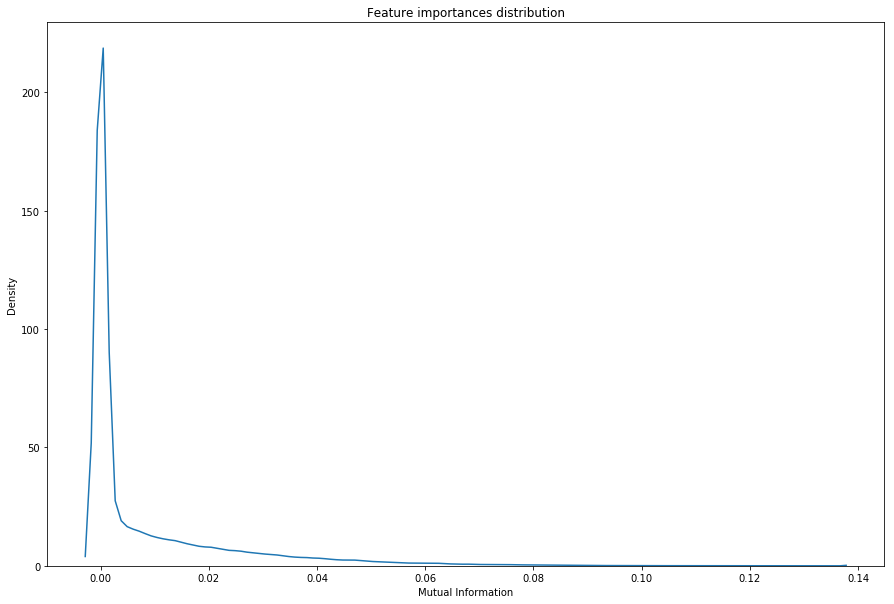

In [118]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.distplot(mi_df, hist=False)
plt.title("Feature importances distribution")
plt.ylabel("Density")
plt.xlabel("Mutual Information")
plt.savefig("../MI_Dist.png")
plt.show()

In [122]:
import matplotlib.pyplot as plt
import os
path = "../Results/"
files = os.listdir(path)
files = sorted(files)
plt.figure(figsize=(15, 10))
for file in files:
    result = pd.read_csv(path + file)
    lr = file.split("_")[3]
    momentum = file.split("_")[5]
    decay = file.split("_")[7]
    plt.plot(result['epoch'], result['mean_squared_error'], label='SGD_%s_%s_%s' % (lr, momentum, decay))
    # plt.ylim(.13, .2)
plt.legend(loc="best")
plt.title()
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.savefig("../MSE_Loss_Different_Optimizers.png")
plt.show()

In [125]:
# pd.read_csv('../Data/BestFeatures.csv', header=None).loc[0, :]

In [141]:
path = "../Results/individual drugs with feature selection/"
results = os.listdir(path)
for file in results:
    if file.startswith('best'):
        plt.figure(figsize=(15, 10))
        result = pd.read_csv(path + file)
        plt.plot(result['epoch'], result['loss'])
        plt.xlabel("Epochs")
        plt.ylabel("Mean Absolute Error")
        plt.title(file.split(".")[0][5:])
        plt.savefig("../Results/individual drugs with feature selection/images/" + file.split(".")[0] + ".png")

/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [6]:
# path = "../Results/Drugs/"
# files = os.listdir(path)
# for file in files:
    
# df = pd.read_csv('../Results/Drugs/AEW541/AEW541.csv', header=None)
# plt.plot(df[0], df[1], "-o")
# plt.xlabel("# of Features")
# plt.ylabel("Mean Absolute Error")
# plt.show()
drug_data = pd.read_csv('../Data/Drugs_data/17-AAG.csv')
# normalized_act_area
# drug_data['ActArea'].describe()

In [10]:
drug_data.index = drug_data['Primary Cell Line Name']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
act_area = np.reshape(drug_data["ActArea"].as_matrix(), (-1, 1))
scaler.fit(act_area)
normalized_act_area = pd.DataFrame(scaler.transform(act_area))
normalized_act_area.index = drug_data.index
normalized_act_area = normalized_act_area.sort_values(by=[0], ascending=False)
normalized_act_area

,0
Primary Cell Line Name,
C32,1.000000
NCI-N87,0.844750
MONO-MAC-1,0.843124
SW48,0.771045
RPMI-7951,0.756961
WM-793,0.690639
WM-266-4,0.678799
MDA-MB-453,0.658600
KMS-11,0.637165


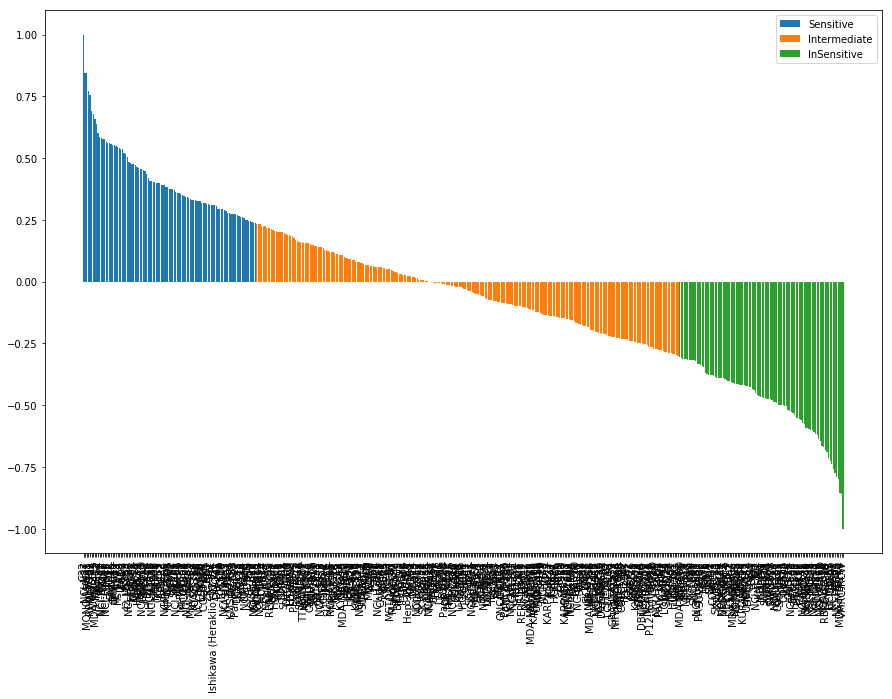

In [56]:
mean = normalized_act_area[0].mean()
std = normalized_act_area[0].std()
sensitive = normalized_act_area[normalized_act_area[0] > mean + 0.8 * std]
insensitive = normalized_act_area[normalized_act_area[0] < mean - 0.8 * std]
intermediate = normalized_act_area[normalized_act_area[0] <= mean + 0.8 * std]
intermediate = intermediate[intermediate[0] >= mean - 0.8 * std]
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.bar(sensitive.index.values, sensitive[0], label="Sensitive")
plt.bar(intermediate.index.values, intermediate[0], label="Intermediate")
plt.bar(insensitive.index.values, insensitive[0], label="InSensitive")
plt.xlabel("Cell Lines")
plt.ylabel("Normalized Activity Area")
plt.legend(loc="best")
plt.show()

In [43]:
# import os
# import pandas as pd
# import numpy as np
# path = "../Data/Drugs_data/"
# for file in os.listdir(path):
#     data = pd.read_csv(path + file)
#     data.drop(labels=[
#                       'EC50 (uM)',
#                       'IC50 (uM)',
#                       ], axis=1, inplace=True)
#     data['class'] = np.nan
#     sd = data['ActArea'].std()
#     mean = data['ActArea'].mean()
#     data.loc[data['ActArea'] > mean + 0.8 * sd, 'class'] = 1
#     data.loc[data['ActArea'] < mean - 0.8 * sd, 'class'] = 0
#     data.dropna(how='any', axis=0, inplace=True)
#     data.to_csv(path + file.split(".")[0] + "_classif.csv")

In [47]:
data = pd.read_csv(path + "17-AAG_classif.csv", index_col="Unnamed: 0.1")

In [48]:
data

,Unnamed: 0,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,Amax,...,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,class
42MGBA_CENTRAL_NERVOUS_SYSTEM,1,42-MG-BA,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-4.2,-62,-19,-72,-69,-84,-78,-91","19.1,42.8,13.5,6.12,7.84,16.9,5.98,7.26",8,Sigmoid,-80.377663,...,1.0,0.0,0.0,2.0,238703.0,94857.0,1.0,298840.0,0.0,1.0
A172_CENTRAL_NERVOUS_SYSTEM,10,A172,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-4.1,-3.6,-8.3,-13,-49,-67,-67,-71","2.33,.79,1.76,4.40,3.10,2.19,1.71,2.43",8,Sigmoid,-68.932632,...,1.0,1.0,0.0,4.0,283146.0,91727.0,1.0,352387.0,0.0,0.0
A2058_SKIN,12,A2058,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-20,-15,-29,-73,-83,-83,-80,-81","5.93,1.32,7.27,5.92,.24,.11,.44,1.69",8,Sigmoid,-81.666542,...,2.0,1.0,0.0,5.0,326039.0,89209.0,0.0,449505.0,0.0,1.0
A2780_OVARY,14,A2780,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-14,-5.1,-27,-68,-88,-92,-92,-92","14.8,3.28,18.7,20.4,6.86,3.44,2.85,1.07",8,Sigmoid,-93.630371,...,0.0,1.0,0.0,2.0,575842.0,194692.0,3.0,588191.0,0.0,1.0
ACHN_KIDNEY,18,ACHN,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-12,-6.3,-2.9,-2.4,-25,-53,-70,-74",".77,2.66,.72,10.2,.33,5.85,7.62,1.24",8,Sigmoid,-73.165833,...,0.0,0.0,0.0,1.0,379457.0,105007.0,0.0,332186.0,1.0,0.0
AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,20,AMO-1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","6.83,-5.8,-50,-86,-95,-95,-95,-95","12.4,4.86,6.11,.096,0,0,0,0",8,Sigmoid,-95.400475,...,0.0,0.0,2.0,1.0,463895.0,150890.0,1.0,335860.0,0.0,1.0
AU565_BREAST,23,AU565,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-18,-13,-55,-72,-69,-72,-73,-71",".28,12.3,7.15,7.16,1.84,1.17,3.39,5.24",8,Sigmoid,-71.350121,...,1.0,0.0,0.0,0.0,355389.0,132411.0,0.0,340121.0,0.0,1.0
BT20_BREAST,29,BT-20,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-17,21.2,-28,-14,-20,-24,-28,-39","1.15,5.07,11.4,1.79,21.1,8.50,1.83,8.98",8,Constant,-19.382681,...,0.0,1.0,0.0,1.0,509051.0,179618.0,3.0,699800.0,0.0,0.0
BT549_BREAST,31,BT-549,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-20,-23,-59,-66,-76,-80,-79,-80","10.5,6.78,3.22,2.13,7.12,7.63,.78,2.75",8,Sigmoid,-77.858429,...,1.0,2.0,3.0,10.0,487942.0,152806.0,0.0,623046.0,0.0,1.0
C2BBE1_LARGE_INTESTINE,33,C2BBe1,17-AAG,HSP90,".0025,.0080,.025,.080,.25,.80,2.53,8","-20,-2.2,16.6,-10,-20,-50,-71,-73","18.5,10.6,29.6,36.0,20.9,6.58,10.7,2.06",8,Sigmoid,-73.168106,...,0.0,0.0,0.0,2.0,516912.0,115769.0,2.0,258231.0,2.0,0.0
